In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report , confusion_matrix
from scipy import stats

In [15]:
df=pd.read_csv("D:\knn\Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [17]:
df.shape

(150, 6)

In [18]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [21]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [23]:
df.isnull().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

<AxesSubplot:ylabel='SepalLengthCm'>

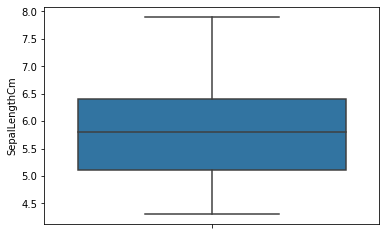

In [25]:
sns.boxplot(y=df['SepalLengthCm'])

<AxesSubplot:ylabel='SepalWidthCm'>

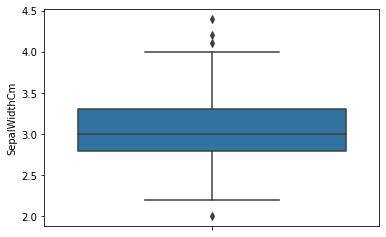

In [26]:
sns.boxplot(y=df['SepalWidthCm'])

<AxesSubplot:ylabel='PetalLengthCm'>

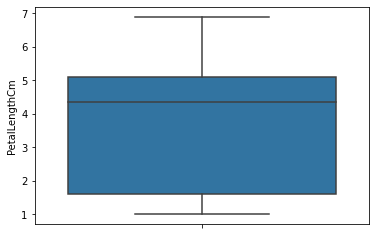

In [27]:
sns.boxplot(y=df['PetalLengthCm'])

<AxesSubplot:ylabel='PetalWidthCm'>

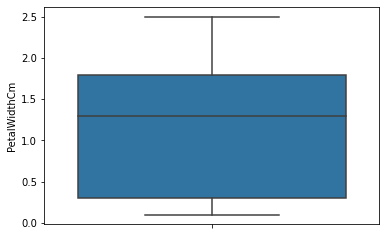

In [28]:
sns.boxplot(y=df['PetalWidthCm'])

In [32]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

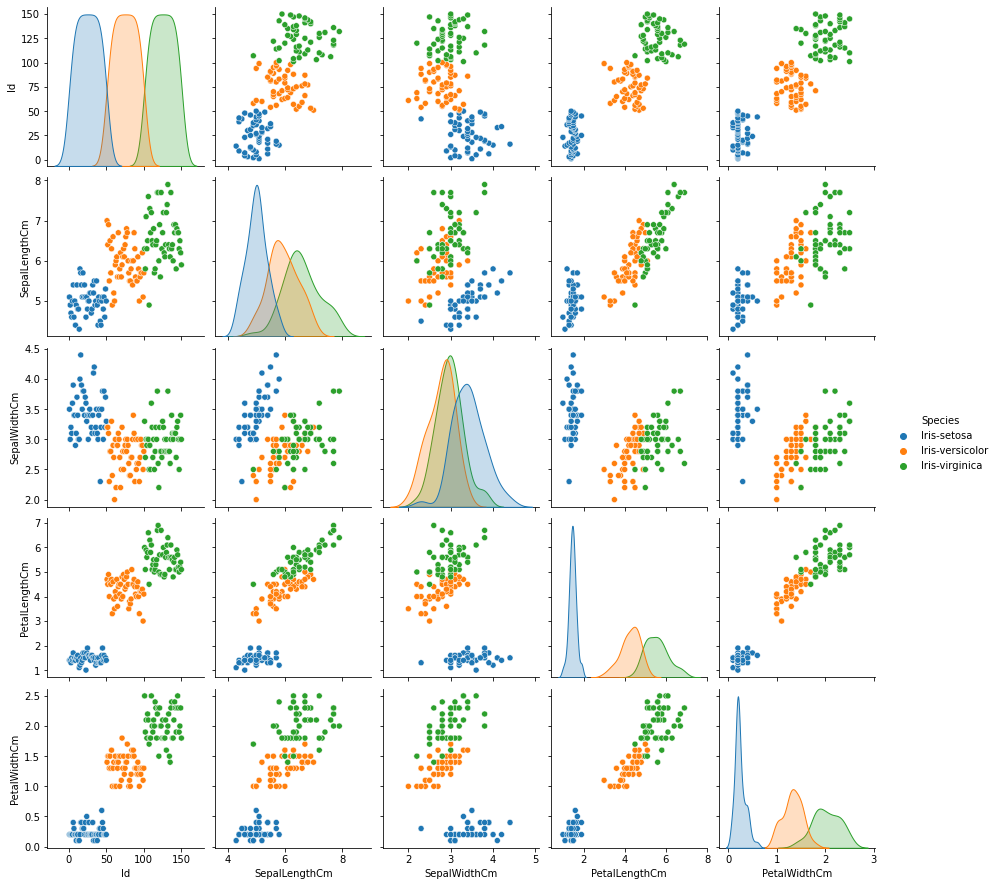

In [33]:
sns.pairplot(df,hue='Species')

#hue='Species' means we are highliting that perticular thing.

# parallal coordinate plot

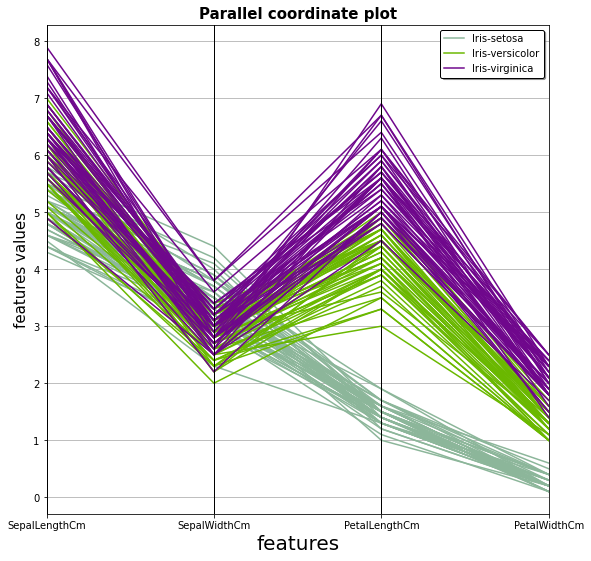

In [48]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(9,9))
parallel_coordinates(df.drop('Id',axis=1),"Species")
plt.title('Parallel coordinate plot', fontsize=15, fontweight='bold')
plt.xlabel("features", fontsize=20)
plt.ylabel("features values", fontsize=15)
plt.legend(loc=1,prop={'size':10}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

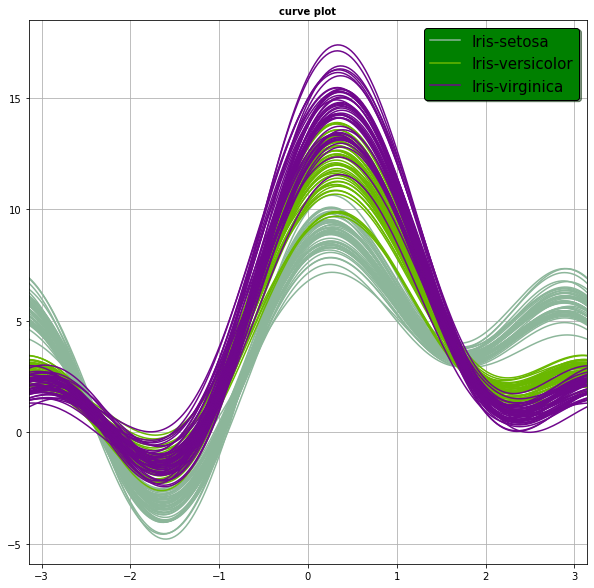

In [53]:
from pandas.plotting import andrews_curves
plt.figure(figsize=(10,10))
andrews_curves(df.drop('Id',axis=1),'Species')
plt.title("curve plot", fontsize=10,fontweight="bold")
plt.legend(loc=1,prop={'size':15},frameon=True,shadow=True,facecolor="green",edgecolor='black')
plt.show()

In [54]:
from sklearn.preprocessing import StandardScaler
features=df.drop("Species",axis=1)
target=df['Species']

In [66]:
scale=StandardScaler()

In [72]:
scale.fit(features)

StandardScaler()

In [73]:
scaled_features=scale.transform(features)


In [74]:
df_new=pd.DataFrame(scaled_features)

In [82]:
df_new.head(3)

,0,1,2,3,4
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977


In [87]:
x_train, x_test, y_train, y_test = train_test_split(df_new, target, test_size=0.25, random_state=45)


In [90]:
x_train.shape

(112, 5)

In [92]:

model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
pred=model.predict(x_test)

In [99]:
pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [100]:
print(classification_report(y_test,pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



In [102]:
accuracy=model.score(x_test,y_test)
print(accuracy*100,'%')

100.0 %


In [ ]:
# for ideal case it gives accuracy 100% practically it will be below 100%